### Overview of this notebook

* what are time series? how are they represented in `sktime`?
* terminology: univariate, multivariate, panel data, hierarchical data
* loading data and validity checking

first some basic terminology on time series (required for the above)

## 2.1 time series - terminology

* time series
* variables, univariate, multivariate
* time index
* panel of time series, instances
* hierarchical time series

#### **time series**, **time index**, **variables**

time series = recorded observations of one object or process at different time points.

observations at different time points are of same kind/type.

observations recorded with **time index** (= recorded time stamp)

(index could be not time but ordered - for simplicity, still call this time series)

observations are of **variables** (= recording of an observable)

time series with 2 or more variables is called **multivariate**

with 1 variable is called **univariate**

**Example: airline data**

one time series recording number of airline passengers

one observable = number of passengers in given calendar month

index = which calendar month (period = span of calendar month)

In [17]:
from sktime.datasets import load_airline

y = load_airline()
y

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [18]:
# pandas models the time index as a separate object:
y.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', length=144)

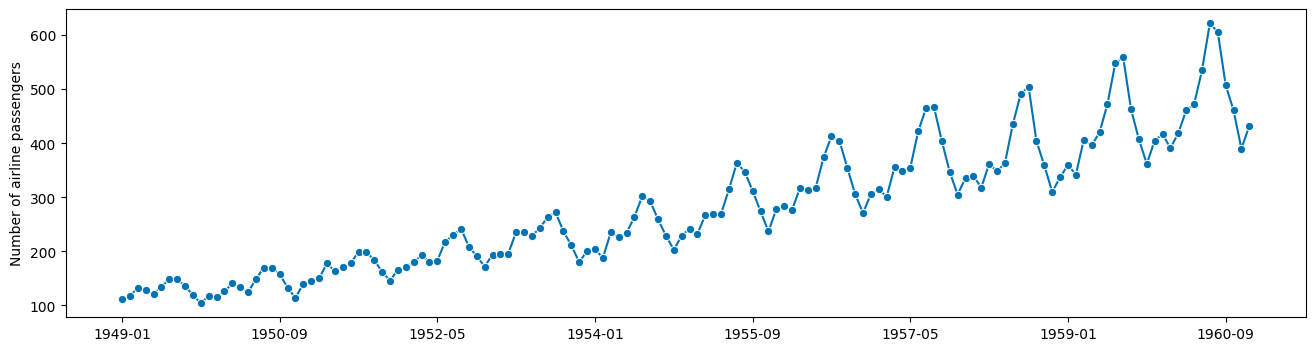

In [19]:
from sktime.utils.plotting import plot_series

fig, ax = plot_series(y)

**Example: macroeconomic data**

one time series recording various macroeconomic variables over time

multiple observables = GDP, unemployment, etc

index = which calendar quarter (period = span of three calendar months)

In [42]:
from sktime.datasets import load_macroeconomic

y = load_macroeconomic()

In [43]:
y

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
Period,,,,,,,,,,,,
1959Q1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71


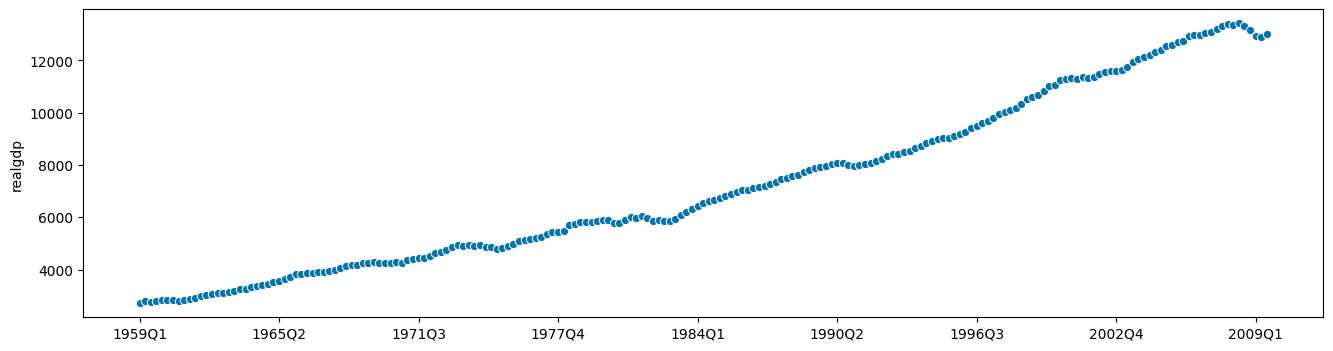

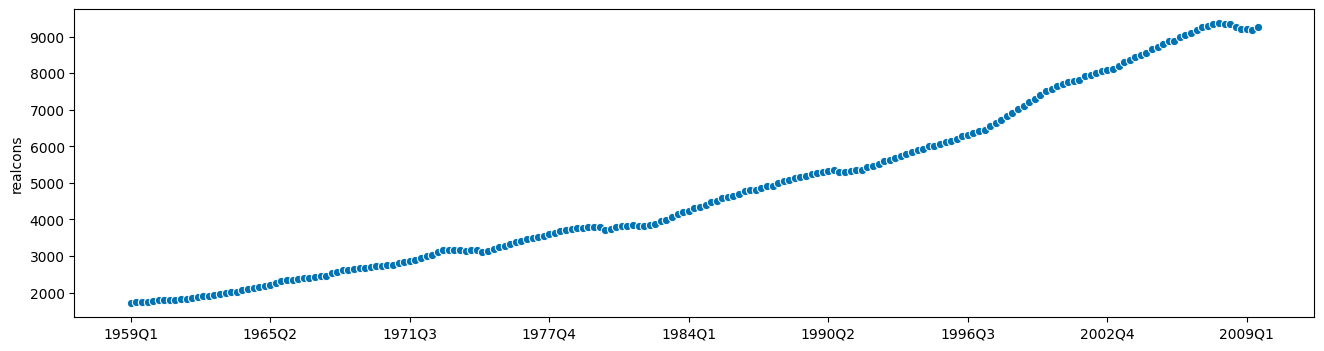

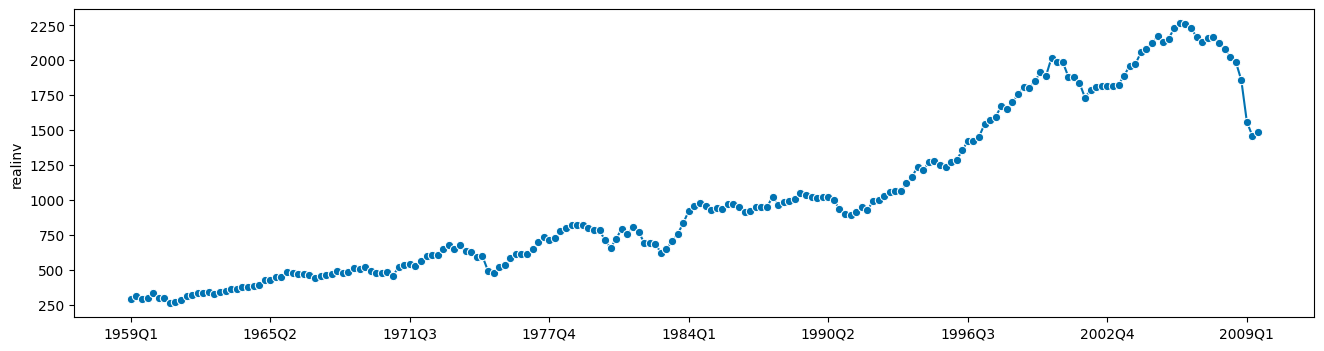

In [21]:
from sktime.utils.plotting import plot_series

for i in y.columns[0:3]:
    fig, ax = plot_series(y.loc[:, i])

common abstract data model:

data frame, with row index = time index; column index = variable index

In [22]:
y

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


#### **panel of time series**

panel of time series is a collection of multiple time series instances

different time series in the collection = **instances**

instances usually assumed independent, or conditionally independent

**instance index** = names/tags of the different instances

**Example: basic motions data**

multiple time series, each time series (or sequence) comes from one trial

each trial involves smartwatch recording of a person while running etc

six observables = 3 accelerometer, 3 gyroscope

index = time stamp of the observable recording

instance = which trial

In [23]:
from sktime.datasets import load_basic_motions

X, _ = load_basic_motions(return_type="pd-multiindex")
X

dim_0      dim_1     dim_2     dim_3     dim_4     dim_5
   timepoints                                                              
0  0            0.079106   0.394032  0.551444  0.351565  0.023970  0.633883
   1            0.079106   0.394032  0.551444  0.351565  0.023970  0.633883
   2           -0.903497  -3.666397 -0.282844 -0.095881 -0.319605  0.972131
   3            1.116125  -0.656101  0.333118  1.624657 -0.569962  1.209171
   4            1.638200   1.405135  0.393875  1.187864 -0.271664  1.739182
...                  ...        ...       ...       ...       ...       ...
79 95          28.459024 -16.633770  3.631869  8.978229 -3.611533 -1.491489
   96          10.260094   0.102775  1.269261 -1.645964 -3.377157  1.283746
   97           4.316471  -3.574319  2.063831 -1.717875 -1.843054  0.484734
   98           0.704446  -4.920444  2.851857 -2.982977 -0.809665 -0.721774
   99          -2.074749  -6.892377  4.848379 -1.350330 -1.203844 -1.776470

[8000 rows x 6 columns]

abstract data model: one value per instance number, time stamp, variable

no common data model, so `sktime` support multiple (will revisit later)

#### **panel vs multivariate?**

important to distinguish independent instance from variable!

instances indicate different observations; variables indicate different observables!

Example - macroeconomic data. Different *variables* because observe the same thing - the economy.

Variables in the same economy are highly interdependent.

Example - basic motions data. Different *instances* because observe different things - different humans.

Motion/gait data of different humans is independent, they do not influence each other (causally or by confounder).

#### **hierarchical time series**

are collections of time series with nested/hierarchical instance index

example: runner & trial repetition = index; observables = motion data of that runner in repetition

example: hospital & patient = index; observables = clinical variables of that patient

example: store & product = index; observable = sales over time period in store of product

Hierarchies may or may not be independent on levels (important assumption to track)

**Example: dummy sales data**

![](../images/hierarchy.png)

concurrent time series

sales of productgroup, in product line, at date

one observable = sales during period, of product group

index = day on which sales are recorded

Note: hierarchies are not independent

In [24]:
from odsc_utils import load_product_hierarchy

y = load_product_hierarchy()

In [25]:
y

Sales
Product line      Product group Date          
Food preparation  Hobs          2000-01  245.0
                                2000-02  144.0
                                2000-03  184.0
                                2000-04  265.0
                                2000-05  236.0
...                                        ...
Food preservation Fridges       2004-08  176.0
                                2004-09  205.0
                                2004-10   59.0
                                2004-11  151.0
                                2004-12  173.0

[240 rows x 1 columns]

## 2.2 time series - `sktime` in-memory data formats

* `sktime` supports and recognizes multiple data formats for convenience and internal use, e.g., `dask`, `xarray`
* abstract data type = "scitype"; in-memory specification = "mtype"
* More information in tutorial on [in-memory data representations and data loading](https://www.sktime.net/en/latest/examples/AA_datatypes_and_datasets.html#In-memory-data-representations-and-data-loading)

#### single time series (univariate or multivariate) = `Series` data scitype

preferred format: `pd.DataFrame` with index=time, cols=variables

#### panel data (univariate or multivariate) = `Panel` data scitype

Preferred format 1: `pd.DataFrame` with 2-level `MultiIndex`, (instance, time), cols=variables

Preferred format 2: 3D `np.ndarray` with index (instance, variable, time)

#### hierarchical data = `Hierarchical` data scitype

preferred format: `pd.DataFrame` with multi-level `MultiIndex`, cols=Variables

Overall, using `pd.DataFrame` is most consistent between different scenarios

### 2.2.1 `Series` preferred format 1 - `pd.DataFrame` specification

`pd.Dataframe` mtype = `pd.DataFrame` with index=time, cols=variables

In [26]:
from sktime.datasets import load_macroeconomic

# load an example time series in pd.DataFrame mtype
y = load_macroeconomic()

The macroeconomic dataset has:

* 12 variables
* observations at 203 time points (quarterly periods)

It is a single time series (not 12 separate time series instances).

In [27]:
y

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
Period,,,,,,,,,,,,
1959Q1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71


### 2.2.2 `Panel` preferred format 1 - `pd-multiindex` specification

`pd-multiindex` = `pd.DataFrame` with 2-level `MultiIndex`, (instance, time), cols=variables

In [28]:
from sktime.datasets import load_basic_motions

# load an example time series panel in pd-multiindex mtype
X, _ = load_basic_motions(return_type="pd-multiindex")

The basic motions dataset has:

* 6 individual time series instances
* six variables per time series instance, `dim_0` to `dim_5`
* individual time series are observed at 100 time points (the same number for all instances)

In [29]:
X

dim_0      dim_1     dim_2     dim_3     dim_4     dim_5
   timepoints                                                              
0  0            0.079106   0.394032  0.551444  0.351565  0.023970  0.633883
   1            0.079106   0.394032  0.551444  0.351565  0.023970  0.633883
   2           -0.903497  -3.666397 -0.282844 -0.095881 -0.319605  0.972131
   3            1.116125  -0.656101  0.333118  1.624657 -0.569962  1.209171
   4            1.638200   1.405135  0.393875  1.187864 -0.271664  1.739182
...                  ...        ...       ...       ...       ...       ...
79 95          28.459024 -16.633770  3.631869  8.978229 -3.611533 -1.491489
   96          10.260094   0.102775  1.269261 -1.645964 -3.377157  1.283746
   97           4.316471  -3.574319  2.063831 -1.717875 -1.843054  0.484734
   98           0.704446  -4.920444  2.851857 -2.982977 -0.809665 -0.721774
   99          -2.074749  -6.892377  4.848379 -1.350330 -1.203844 -1.776470

[8000 rows x 6 columns]

### 2.2.3 `Panel` preferred format 2 - `numpy3D` specification

`numpy3D` = 3D `np.ndarray` with index (instance, variable, time)

instance/time index is interpreted as integer

IMPORTANT: unlike `pd-multiindex`, this assumes:

* all individual series have the same length
* all individual series have the same index

In [30]:
from sktime.datasets import load_basic_motions

# load an example time series panel in numpy mtype
X, _ = load_basic_motions(return_type="numpy3D")

The basic motions dataset has:

* 80 individual time series instances
* six variables per time series instance
* individual time series are observed at 100 time points (the same number for all instances)

In [31]:
X.shape

(80, 6, 100)

### 2.2.3 `Hierarchical` preferred format - `pd_multiindex_hier` specification

`pd_multiindex_hier` = `pd.DataFrame` with multi-level `MultiIndex`,  last level is time, cols=variables

In [32]:
from odsc_utils import load_product_hierarchy

y = load_product_hierarchy()

the dummy sales data has:

* two hierarchy levels, `Product line` and `Product group`
* two hierarchy nodes for `Product line`, four hierarchy nodes for `Product group`
* a `MultiIndex` with three levels, two of them hierarchy, one time at monthly periods
* a single variable, `Sales`, each observed for the same 48 months

In [33]:
y

Sales
Product line      Product group Date          
Food preparation  Hobs          2000-01  245.0
                                2000-02  144.0
                                2000-03  184.0
                                2000-04  265.0
                                2000-05  236.0
...                                        ...
Food preservation Fridges       2004-08  176.0
                                2004-09  205.0
                                2004-10   59.0
                                2004-11  151.0
                                2004-12  173.0

[240 rows x 1 columns]

## 2.3 loading and validity checking

for custom data sets:

1. use `pandas` `read_csv` or similar utilities to obtain a `pd.DataFrame` or `np.ndarray`
2. try to bring the result in one of the preferred specifications
3. use the `check_is_mtype` utility to check compliance - inspect informative error messages
4. repeat 2-3 until the data format check passes

In [34]:
# let's pretend we just loaded this from csv
from sktime.datasets import load_osuleaf

X_pd, _ = load_osuleaf(return_type="pd-multiindex")

let's now check whether it complies with the `pd-multiindex` specification

In [35]:
from sktime.datatypes import check_is_mtype

valid, error_msg, metadata = check_is_mtype(X_pd, "pd-multiindex", return_metadata=True)

In [36]:
# is it valid?
valid

True

In [37]:
# helpful metadata, check if this is as per expectations
metadata

{'is_univariate': True,
 'is_empty': False,
 'has_nans': False,
 'n_instances': 442,
 'is_one_series': False,
 'is_equal_length': True,
 'is_equally_spaced': True,
 'n_panels': 1,
 'is_one_panel': True,
 'mtype': 'pd-multiindex',
 'scitype': 'Panel'}

let's see what happens if it is not in the expected format.

We have a `pd.DataFrame`, so if we check against `numpy3D`, it should complain:

In [38]:
valid, error_msg, metadata = check_is_mtype(X_pd, "numpy3D", return_metadata=True)

In [39]:
valid

False

In [40]:
error_msg

"obj must be a numpy.ndarray, found <class 'pandas.core.frame.DataFrame'>"

This tells us that we should first convert into `np.ndarray` as expected.

For further details on data formats, see the tutorial on [in-memory data representations and data loading](https://www.sktime.net/en/latest/examples/AA_datatypes_and_datasets.html#In-memory-data-representations-and-data-loading).

The "datatypes" tutorial also contains:

* full formal specifications of the mtypes (= machine representations)
* common examples for loading from csv and formatting
* utilities for loading data for commonly used benchmark problems

All supported in-memory representations are python inspectable in `sktime.datatypes.MTYPE_REGISTER`

Note that this includes "exotic", rarely used ones and representations of objects that aren't time series.
Formats for time series panels are indicated by the `Panel` mtype.


---

### Credits: notebook 2 - time series

notebook creation: fkiraly